# The DFT shifting theorem

In [1]:
%run ../setup.ipynb

We've seen that for signals $x$ which are pure sinusoids at an analysis frequency of index $\red{m}$, the corresponding DFT component $\darkblue{X[m]}$ encodes the signal's amplitude and phase as a single complex number.

But what can we say about phase for more general signals?  In particular, if we have an arbitrary signal $\blue{x}$ (not necessarily a sinusoid), what happens if we delay it?

Before we continue down this line of thought, we must first establish what it means to delay a signal under our periodicity assumption.
This leads us to the notion of a **circular shift**.

````{prf:definition} Circular shifting
Let $\blue{x[n]}$ be a signal of $N$ samples with DFT series $\darkblue{X[m]}$, and define 

```{math}
\purple{y[n] = x[n-d \mod N]}
```
to be the **circular shift** of $\blue{x}$ by $\red{d}$ samples.
````

When it is clear from context that shifting is circular, we may drop the "$\mod N$" notation and simply write $\purple{y[n] = x[n-d]}$.

Circular shifting can seem like a strange thing to do: taking samples from the end of the signal and putting them at the beginning?

However, it is a natural consequence of combining our {ref}`periodicity assumption <dft-periodicity>` with the definition of delay.

Indeed, it can lead to some strange behaviors if $x[n]$ is discontinuous at the repetition boundaries.

<Figure size 576x288 with 2 Axes>

<Figure size 576x288 with 2 Axes>

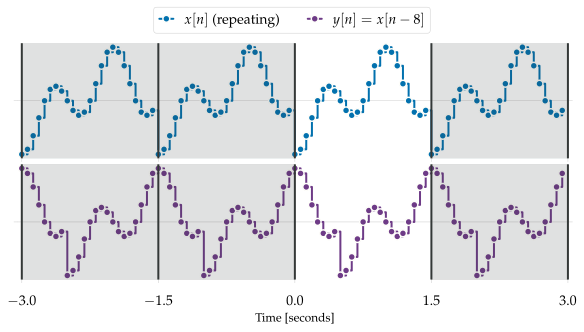

In [66]:
# Plot a repeating signal
fig, ax = plt.subplots(figsize=(8, 4), nrows=2, sharex=True, sharey=True)

fs = 16

t = np.arange(-3 * fs, 3. * fs) / fs

f0 = 1.5
f1 = 1/2

x_part = np.cos(2 * np.pi * f0 * t[:int(f0 * fs)]) + np.cos(2 * np.pi * f1 * t[:int(f0 * fs)])
y_part = np.roll(x_part, 8)
x_full = np.tile(x_part, 4)
y_full = np.tile(y_part, 4)

ax[0].step(t, x_full, marker='o', where='post', label=r'$x[n]$ (repeating)')
ax[1].step(t, y_full, marker='o', color=colors[4], where='post', label=r'$y[n] = x[n-8]$')
ax[0].vlines([-3, -1.5, 0, 1.5, 3], -3, 3, colors=colors[3], zorder=3)
ax[1].vlines([-3, -1.5, 0, 1.5, 3], -3, 3, colors=colors[3], zorder=3)


ax[0].set_ylim([-2.15, 2.15])
ax[0].set_xlim([-3.05, 3.05])
ax[0].set(yticks=[0], yticklabels=[])
ax[0].set_xticks([-3, -1.5, 0, 1.5, 3])
ax[0].axvspan(-3, 0, zorder=2, color=colors[3], alpha=0.15)
ax[0].axvspan(1.5, 3, zorder=2, color=colors[3], alpha=0.15)
ax[1].axvspan(-3, 0, zorder=2, color=colors[3], alpha=0.15)
ax[1].axvspan(1.5, 3, zorder=2, color=colors[3], alpha=0.15)
ax[0].label_outer()
ax[1].set_xlabel('Time [seconds]');

#ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)
handles, labels = [], []
for _ax in ax.flat:
    _h, _l = _ax.get_legend_handles_labels()
    handles.extend(_h)
    labels.extend(_l)

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)

glue("circ_shift", fig, display=False);

```{glue:figure} circ_shift
---
name: circ_shift
alt: illustration of circular shifting
---

A repeating signal $\blue{x[n]}$ with repetition boundaries (vertical lines) is shifted by 8 samples to produce $\purple{y[n]}$; three additional repetitions are illustrated in the shaded regions.
Because $\blue{x[n]}$ is discontinuous at the repetition boundary, this discontinuity is shifted to the middle of $\purple{y[n]}$, appearing as a large vertical gap in the signal.
```

Given this definition of shifting (delay), we can say the following about its effect on the DFT spectrum of a signal.

(shifting-theorem)=
````{prf:theorem} DFT shifting
:label: dft-shifting-thm

Let $\blue{x[n]}$ be a signal with DFT spectrum $\darkblue{X[m]}$, and let $\purple{y[n] = x[n-d]}$ be the circular shift of $\blue{x}$ by $\red{d}$ samples.

The DFT spectrum of $\purple{y[n]}$ is given by:

```{math}
\magenta{Y[m]} = \darkblue{X[m]} \cdot \exp\left(-\mathrm{j} \cdot 2\pi \cdot \frac{m}{N} \cdot \red{d}\right).
```
````

This says that no matter what delay we use, it's always possible to exactly predict the spectrum of the delayed signal from the spectrum of the input signal.

The proof of the shifting theorem is purely algebraic, and relies on the periodicity assumption of $\blue{x}$ to allow a change of variables in the similarity calculation.
```{prf:proof}
:class: full-width

If we have an index $n$, we will introduce a new variable $k=n-d$, and equivalently, $n=k+d$.
In this case, $n=0$ corresponds to $k=-d$, and $n=N-1$ corresponds to $k=N-1-d$.
Then we can calculate the DFT spectrum as follows

\begin{align*}
\magenta{Y[m]} &= \sum_{n=0}^{N-1} \purple{y[n]} \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n \right) & \text{By definition of DFT}\\
&= \sum_{n=0}^{N-1} \purple{x[n-d]} \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n \right) &y[n] = x[n-d]\\
&= \sum_{k=-d}^{N-1-d} \blue{x[k]} \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot \red{(k+d)} \right) & k=n-d\\
&= \sum_{k=-d}^{N-1-d} \blue{x[k]} \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot \red{k} \right) \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot \red{d} \right) & e^{a+b}=e^a\cdot e^b\\
&= \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot \red{d} \right) \cdot\left( \sum_{k=-d}^{N-1-d} \blue{x[k]} \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot \red{k} \right)\right) & \text{Delay factor is constant over sum}\\
&= \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot \red{d} \right) \cdot \darkblue{X[m]} & \text{by definition of DFT}.
\end{align*}

The last step follows because even though the summation ranges from $k=-d$ to $k=N-1-d$, it still computes the full DFT of $x$, just in a different order.
```

## What does this do?

It's worth taking some time to understand the shifting theorem.
Not only does it say exactly how the spectrum changes, as a signal shifts in time, but the change itself is also interesting.

Note that the argument of the exponential is a purely imaginary number:

```{math}
-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot \red{d}.
```

This means that multiplication implements a **rotation** of $\darkblue{X[m]}$ in the complex plane.
Its phase can change, but the magnitude must be the same.

Of course, this is exactly what we would hope should happen: delay only changes the horizontal (time) position of a signal, not its amplitude.

A slightly more subtle point is that each DFT component $\darkblue{X[m]}$ changes **by a different amount**: the rotation depends on both $\red{m}$ and $\red{d}$.

````{prf:example}

We can visualize the shifting theorem by examining what happens to each DFT component $X[m]$ as a test signal is circularly shifted by different amounts.

```{glue:figure} shifting-animation
---
name: shifting-animation
---

*Top*: a test signal $\blue{x[n]}$ of 16 samples is circularly shifted by successively larger amounts $\red{d=0, 1, 2, \dots, 15}$.
*Bottom subplots*: each DFT component $\darkblue{X[m]}$ ($m=0, 1, 2, \dots, 15$) is plotted in the complex plane.
As the test signal is delayed, each DFT component rotates by an angle proportional to both the delay $\red{d}$ and frequency index $\red{m}$.
The DFT components are arranged so that $\darkblue{X[m]}$ and $\darkblue{X[N-m]}$ can be easily compared.
```

{numref}`shifting-animation` illustrates several key features of circular shifting.
First, observe that the different DFT components rotate at different *speeds* when the delay $\red{d}$ changes.
For example, for each full cycle of the $\red{m=1}$ component, the $\red{m=2}$ component makes two cycles.
In each case, we can see that the magnitude of $\darkblue{X[m]}$ is preserved, as the distance between $\darkblue{X[m]}$ and the origin never changes.

Note also that the motion of each $\darkblue{X[m]}$ is equal and opposite to that of $\darkblue{X[N-m]}$ (eg, $m=1$ and $m=15$, $m=2$ and $m=14$, etc).
Relatedly, the components $X[0]$ (the *DC component*) and $X[N/2]$ ($m=8$, the Nyquist component for $N=16$) do not seem to rotate at all.
In the first case, this is because the rotation is proportional to $m=0$, so no rotation occurs.
In the second case, we see that it oscillates between positive and negative real values.
These observations are all instances of a general property of [conjugate symmetry](conjugate-symmetry) that we will investigate thoroughly in the next section.
````

<Figure size 576x288 with 18 Axes>

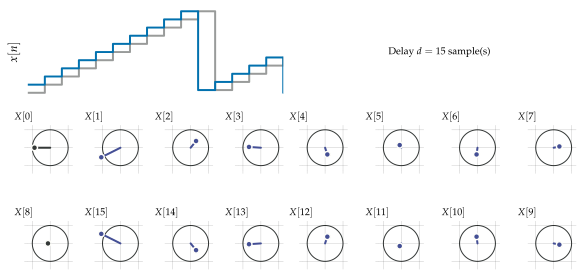

In [70]:
t = np.linspace(0, 1, num=16, endpoint=False)
x = scipy.signal.sawtooth(2 * np.pi * 1.5 * t) / np.sqrt(len(t))

fig = plt.figure(figsize=(8, 4))

mosaic = \
'''
TTTTxxxx
01234567
8FEDCBA9
'''

freq = '0123456789ABCDEF'

axes = fig.subplot_mosaic(mosaic)

axes['T'].step(t, x, where='post', color=colors[3], zorder=-5, linewidth=2, alpha=0.5)[0]
xplot = axes['T'].step(t, x, where='post')[0]
td = axes['x'].text(0.5, 0.5, f'Delay $d =  0$ sample(s)', ha='center', va='center', transform=axes['x'].transAxes)
axes['x'].set(xticks=[], yticks=[])
axes['T'].set(yticks=[], xticks=[], ylabel='$x[n]$')

X = np.fft.fft(x)

components = []
for i, f in enumerate(freq):
    if i in [0, len(t)//2]:
        color = colors[3]
    else:
        color = colors[11]
        
    components.insert(i, axes[f].plot([0, X[i].real], [0, X[i].imag], 
                                              color=color, marker='o', markersize=6,
                                              linewidth=2, markevery=[-1])[0])
    
    if i > 0:
        axes[f].sharex(axes['0'])
        axes[f].sharey(axes['0'])
    circ = patches.Ellipse([0, 0], 2, 2, facecolor='none', edgecolor=colors[3], zorder=-1, linewidth=1)
    
    axes[f].text(-2, 2, f'$X[{i}]$', ha='left', va='top')
    axes[f].add_patch(circ)
    axes[f].set(aspect='equal', xlim=[-1.25, 1.25], ylim=[-1.25, 1.25], xticklabels=[], yticklabels=[])
    axes[f].label_outer()
    
    
def init():
    return [xplot, td] + components

def animate(n):
    xr = np.roll(x, n)
    xplot.set_ydata(xr)
    td.set_text(f'Delay $d = {n:2d}$ sample(s)')
    Xr = np.fft.fft(xr)
                    
    for i, f in enumerate(freq):
        components[i].set_data([0, Xr[i].real], [0, Xr[i].imag])
                    
    return [xplot,td] + components

animation = FuncAnimation(fig, animate, frames=len(t), init_func=init, interval=5 * 1000/24, blit=True);
glue('shifting-animation', animation, display=False);

In [71]:
animation

Once 
 
 Loop 
 
 Reflect

## What does this not do?

The shifting theorem implies that if a signal is circularly shifted, its magnitude spectrum is unchanged:

```{math}
\purple{y[n] = x[n-d]} \quad\quad\Rightarrow\quad\quad |\magenta{Y[m]}| = |\darkblue{X[m]}|.
```

However, the converse is **not true**: two signals with the same magnitude spectrum may not be related by a circular shift of one another.

````{prf:example}

Let $\blue{x[n] = 1, 0, 0, 0, 0, \dots}$ denote an impulse with $N$ samples, and let $\purple{y = -x}$ denote its negation.
As shown in the {ref}`previous chapter <dft-impulse>`, an impulse signal has spectrum $\darkblue{X[m] = 1}$ for all $m$.
By {ref}`DFT linearity <dft-linearity>`, we also know that $\purple{y= -x}$ implies $\magenta{Y[m]} = \darkblue{-X[m]}$.
As a result, we have that
```{math}
|\magenta{Y[m]}| = |\darkblue{-X[m]}| = |\darkblue{X[m]}| = 1 \quad \text{for } m = 0, 1, \dots, N-1
```
so the two signals have the same magnitude spectrum.
However, there is no delay $\red{d}$ that turns $\blue{x}$ into $\purple{y}$.

```{glue:figure} shifting
---
name: magnitude-shifting
alt: illustration of DFT magnitudes as a signal is delayed or negated
---

*Left*: an impulse (top), a negative impulse (middle), and a 3-step delay (bottom).
*Center*: the DFT spectrum (real and imaginary) components of each signal are distinct.
*Right*: all three signals have identical magnitude spectra $|\darkblue{X[m]}| = 1$ .
```

````

<Figure size 576x288 with 9 Axes>

<Figure size 576x288 with 9 Axes>

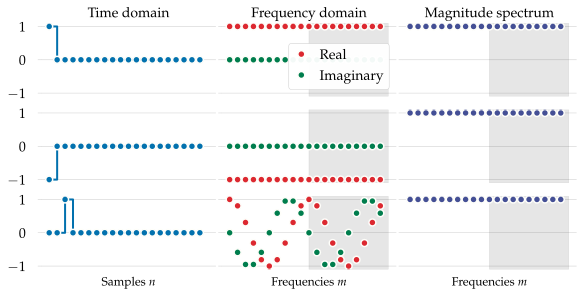

In [69]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 4))

N = 20

n = np.arange(N)
x1 = np.zeros(N)
x1[0] = 1

x2 = -x1

x3 = np.roll(x1, 2)

X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
X3 = np.fft.fft(x3)

ax[0, 0].step(n, x1, marker='o', color=colors[0], where='post')
ax[1, 0].step(n, x2, marker='o', color=colors[0], where='post')
ax[2, 0].step(n, x3, marker='o', color=colors[0], where='post')

ax[0,0].label_outer()
ax[1,0].label_outer()
ax[2,0].label_outer()

ax[0, 1].plot(X1.real, marker='o', color=colors[1], linestyle='', label='Real')
ax[1, 1].plot(X2.real, marker='o', color=colors[1], linestyle='')
ax[2, 1].plot(X3.real, marker='o', color=colors[1], linestyle='')

ax[0, 1].plot(X1.imag, marker='o', color=colors[5], linestyle='', label='Imaginary')
ax[1, 1].plot(X2.imag, marker='o', color=colors[5], linestyle='')
ax[2, 1].plot(X3.imag, marker='o', color=colors[5], linestyle='')

ax[0, 1].legend(loc='lower right')

ax[0, 1].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)
ax[1, 1].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)
ax[2, 1].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)

ax[0,1].label_outer()
ax[1,1].label_outer()
ax[2,1].label_outer()

ax[0, 2].plot(np.abs(X1), marker='o', color=colors[11], linestyle='')
ax[1, 2].plot(np.abs(X2), marker='o', color=colors[11], linestyle='')
ax[2, 2].plot(np.abs(X3), marker='o', color=colors[11], linestyle='')

ax[0, 2].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)
ax[1, 2].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)
ax[2, 2].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)

ax[0, 2].label_outer()
ax[1, 2].label_outer()
ax[2, 2].label_outer()

ax[2, 0].set(xlabel='Samples $n$')
ax[2, 1].set(xlabel='Frequencies $m$')
ax[2, 2].set(xlabel='Frequencies $m$')

ax[0, 0].set(title='Time domain')
ax[0, 1].set(title='Frequency domain')
ax[0, 2].set(title='Magnitude spectrum');
ax[0, 0].set_xticks([]);
ax[0, 0].set(xlim=[-1, N+1])
glue('shifting', fig, display=False)

```{tip}
Phase is important.  Having the same magnitude spectrum is not enough to ensure that two signals are the same except for a phase shift.
```